# Plot conformal space as a scatter plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from scipy.stats import norm
from pathlib import Path

In [2]:
root_p = Path('/home/neuromod/ASD_project_clean')
model1_p = root_p / 'Results/Validation/validation_net_split_1_model_1_combined_p_values.tsv'
pheno_valid_p = root_p / 'Data/ABIDE_2_Pheno_PSM_matched_ados.tsv'

## Load and preparation

In [3]:
pheno_valid = pd.read_csv(pheno_valid_p, sep='\t')
model1 = pd.read_csv(model1_p, sep='\t')
model1.rename(columns={'V1': 'p_ASD', 'V2': 'p_TDC'}, inplace=True)

In [4]:
pheno_valid.loc[:, 'is_hps'] = ((model1.p_ASD>0.2) & (model1.p_TDC<=0.2)).values
pheno_valid.loc[:, 'p_ASD'] = model1.loc[:, 'p_ASD'].values
pheno_valid.loc[:, 'p_TDC'] = model1.loc[:, 'p_TDC'].values

## Plot the conformal space

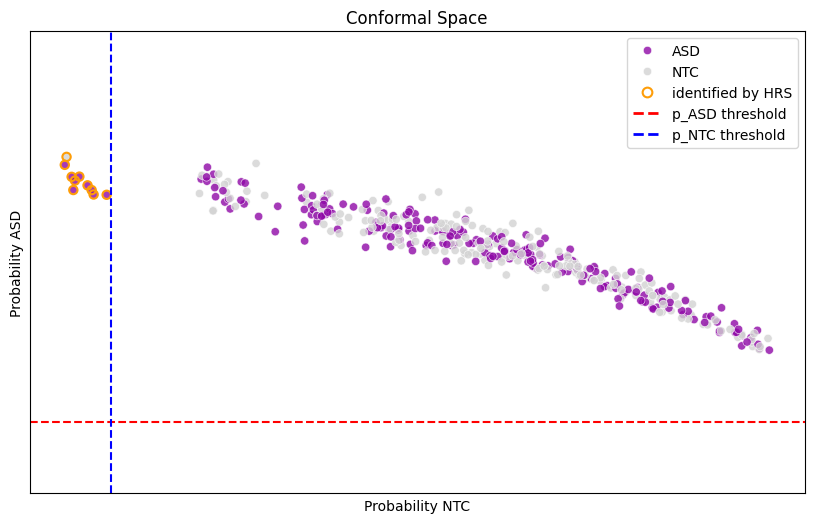

In [5]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='p_TDC', y='p_ASD', hue='DX_GROUP', data=pheno_valid, 
                          palette=['#8F09A7', 'lightgrey'], alpha=0.8)
rings = sns.scatterplot(x='p_TDC', y='p_ASD', style='is_hps', markers=['o'], data=pheno_valid[pheno_valid['is_hps']], 
                         color='k', edgecolor='#FE9D08', facecolors='none', linewidth=1.5)

# Add lines for thresholds
hline = plt.axhline(y=0.2, color='r', linestyle='--')
vline = plt.axvline(x=0.2, color='b', linestyle='--')

# Custom legend handles for threshold lines and HRS ring
legend_lines = [Line2D([0], [0], marker='o', color='none', markerfacecolor='none', 
                       markeredgecolor='#FE9D08', markersize=7, markeredgewidth=1.5),
                Line2D([0], [0], color='r', linestyle='--', lw=2),
                Line2D([0], [0], color='b', linestyle='--', lw=2)]

# Custom legend labels
legend_labels = ['identified by HRS', 'p_ASD threshold', 'p_NTC threshold']

# Retrieve the handles and labels from the scatter plot
handles, labels = scatter.get_legend_handles_labels()

# Update labels for DX_GROUP
new_labels = ['ASD' if label == 'Autism' else 'NTC' for label in labels]

# Construct the legend
plt.legend(handles=handles[:-1] + legend_lines, labels=new_labels[:-1] + legend_labels)

# Do some stuff
plt.xticks([])
plt.yticks([])
plt.ylim(0, 1.3)

plt.title('Conformal Space')
plt.xlabel('Probability NTC')
plt.ylabel('Probability ASD')

scatter.figure.savefig(root_p / 'Figures/conformal_space.png',dpi=300)
scatter.figure.savefig(root_p / 'Figures/conformal_space.svg',dpi=300)
plt.show()

# Create logistic regression plot

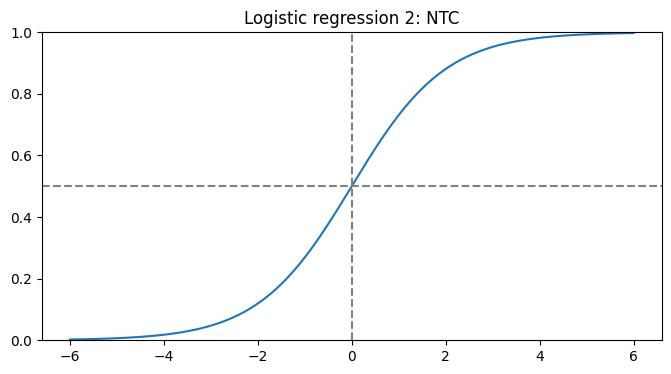

In [6]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate data points
x = np.linspace(-6, 6, 200)
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sigmoid Function")
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Set the limits and labels
plt.ylim(0, 1)

plt.title('Logistic regression 2: NTC')  #Logistic regression 1: ASD
plt.savefig(root_p / 'Figures/logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot a bell curve

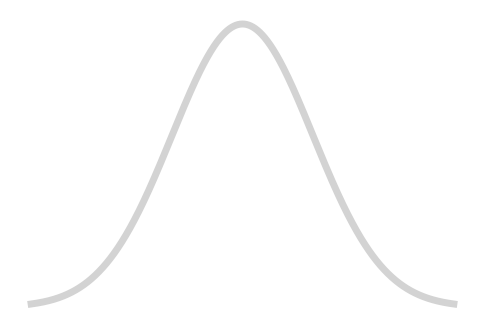

In [7]:
# Data for the bell curve
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(6, 4))
plt.plot(x, y, color='lightgrey', linewidth=5) #8F09A7
plt.axis('off')

plt.savefig(root_p / 'Figures/curve_ntc.png', dpi=300, bbox_inches='tight')
plt.show()